In [187]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

In [188]:
# Read image
fruite_path = "img/fruit.jpg"
fruite = cv.imread(fruite_path)

In [189]:
# Write A function to create complementary color image
def complementary_color_RGB(img):
    # Split the image into three channels
    b, g, r = cv.split(img)

    b = cv.bitwise_not(b)
    g = cv.bitwise_not(g)
    r = cv.bitwise_not(r)

    # Merge the three channels
    img = cv.merge([b, g, r])

    return img

In [190]:
def complementary_color_HSI(img):
    # Convert RGB to HSI
    img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    # Split the image into three channels
    h, s, i = cv.split(img)

    # Complementary color of H channel
    h = cv.bitwise_not(h)


    # Merge three channels
    img = cv.merge([h, s, i])
    # Convert HSI to RGB
    img = cv.cvtColor(img, cv.COLOR_HSV2BGR)
    return img

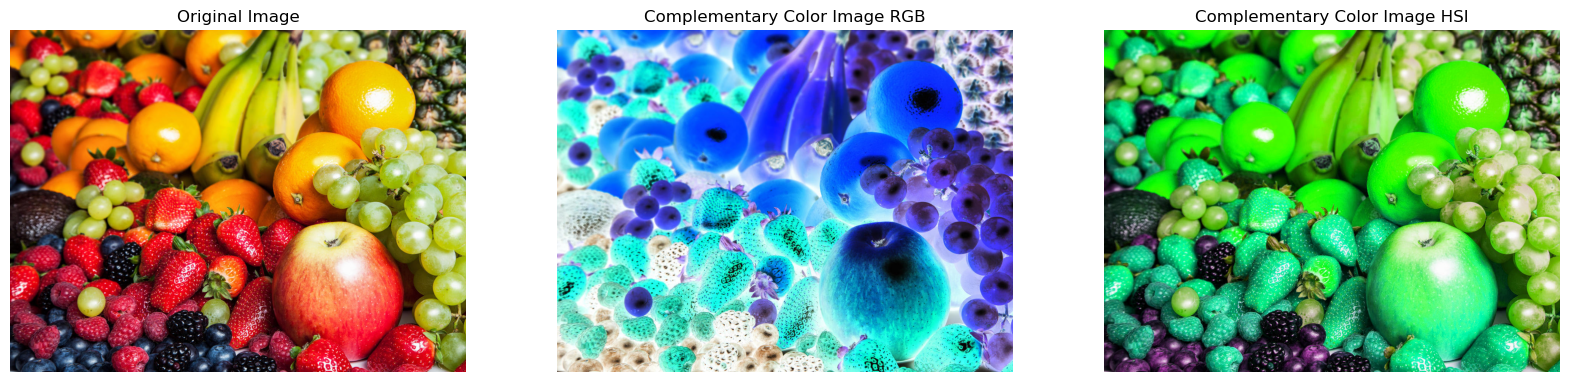

In [191]:
# Remove the output folder if it exists
if os.path.exists("output/"):
    os.system("rm -rf output/")

os.mkdir("output/")

if not os.path.exists("output/5_1"):
    os.mkdir("output/5_1")

# Write the image to output folder
complementary_frutie_RGB = complementary_color_RGB(fruite)
cv.imwrite("output/5_1/complementary_fruite_RBG.jpg", complementary_frutie_RGB)

complementary_frutie_HSI = complementary_color_HSI(fruite)
cv.imwrite("output/5_1/complementary_fruite_HSI.jpg", complementary_frutie_HSI)

# Show original image and complementary color image
plt.figure(figsize=(20, 10))
plt.subplot(131), plt.title("Original Image"), plt.imshow(cv.cvtColor(fruite, cv.COLOR_BGR2RGB)), plt.axis("off")
plt.subplot(132), plt.title("Complementary Color Image RGB"), plt.imshow(cv.cvtColor(complementary_frutie_RGB, cv.COLOR_BGR2RGB)), plt.axis("off")
plt.subplot(133), plt.title("Complementary Color Image HSI"), plt.imshow(cv.cvtColor(complementary_frutie_HSI, cv.COLOR_BGR2RGB)), plt.axis("off")
plt.savefig("output/5_1/complementary_color.jpg")
plt.show()